In [4]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


## load dataset

In [33]:
from IPython.display import clear_output, Audio
import os
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import shutil
import matplotlib.pyplot as plt

In [6]:
!pwd

/home/glucas11/projects/repos/speech_feedback/hesitation_detection


In [7]:
if not os.path.exists("dev.zip"):
	!wget "https://huggingface.co/datasets/gabrielrstan/CORAA-v1.1/resolve/main/dev.zip" -P "."

if not os.path.isdir("dev/"):
	!unzip "dev.zip" -d "."

if os.path.isdir("dev/"):
	clear_output()
	print("data unzipped")
else:
	# !rm /content/dev.zip
	raise Exception("Cannot unzip.")

data unzipped


In [8]:
if not os.path.exists("metadata_dev_final.csv"):
	!wget "https://huggingface.co/datasets/gabrielrstan/CORAA-v1.1/resolve/main/metadata_dev_final.csv" -P "."

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('metadata_dev_final.csv')
df.head()

,file_path,task,variety,dataset,accent,speech_genre,speech_style,up_votes,down_votes,votes_for_hesitation,votes_for_filled_pause,votes_for_noise_or_low_voice,votes_for_second_voice,votes_for_no_identified_problem,text
0,dev/sp/58031_sp_.wav,annotation,pt_br,SP2010,São Paulo (cap.),Conversation or Interview or Reading,Spontaneous and Read Speech,3,0,0.0,0.0,1.0,0.0,3.0,no meu ponto de vista
1,dev/sp/58032_sp_.wav,annotation,pt_br,SP2010,São Paulo (cap.),Conversation or Interview or Reading,Spontaneous and Read Speech,2,1,1.0,1.0,1.0,0.0,1.0,cada cidadão cada ser humano é um mundo né cad...
2,dev/sp/58033_sp_.wav,annotation,pt_br,SP2010,São Paulo (cap.),Conversation or Interview or Reading,Spontaneous and Read Speech,3,0,0.0,0.0,2.0,0.0,1.0,maneira né
3,dev/sp/58034_sp_.wav,annotation,pt_br,SP2010,São Paulo (cap.),Conversation or Interview or Reading,Spontaneous and Read Speech,3,1,1.0,1.0,1.0,0.0,2.0,aham
4,dev/sp/58035_sp_.wav,annotation,pt_br,SP2010,São Paulo (cap.),Conversation or Interview or Reading,Spontaneous and Read Speech,3,0,1.0,2.0,1.0,0.0,2.0,eh na cidade numa cidade


In [11]:
df[['up_votes', 'down_votes']].describe()

,up_votes,down_votes
count,7522.000000,7522.000000
mean,1.052380,0.040415
std,0.825514,0.197617
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,3.000000,2.000000


## manipulate dataset

In [12]:
temp_df = df.copy()
temp_df = temp_df[temp_df['up_votes'] > 1]
temp_df = temp_df[temp_df['down_votes'] == 0]
temp_df = temp_df.reset_index(drop=True)
temp_df

,file_path,task,variety,dataset,accent,speech_genre,speech_style,up_votes,down_votes,votes_for_hesitation,votes_for_filled_pause,votes_for_noise_or_low_voice,votes_for_second_voice,votes_for_no_identified_problem,text
0,dev/sp/58031_sp_.wav,annotation,pt_br,SP2010,São Paulo (cap.),Conversation or Interview or Reading,Spontaneous and Read Speech,3,0,0.0,0.0,1.0,0.0,3.0,no meu ponto de vista
1,dev/sp/58033_sp_.wav,annotation,pt_br,SP2010,São Paulo (cap.),Conversation or Interview or Reading,Spontaneous and Read Speech,3,0,0.0,0.0,2.0,0.0,1.0,maneira né
2,dev/sp/58035_sp_.wav,annotation,pt_br,SP2010,São Paulo (cap.),Conversation or Interview or Reading,Spontaneous and Read Speech,3,0,1.0,2.0,1.0,0.0,2.0,eh na cidade numa cidade
3,dev/sp/58036_sp_.wav,annotation,pt_br,SP2010,São Paulo (cap.),Conversation or Interview or Reading,Spontaneous and Read Speech,3,0,0.0,0.0,2.0,0.0,2.0,que nem são paulo uma cidade grande né
4,dev/sp/58038_sp_.wav,annotation,pt_br,SP2010,São Paulo (cap.),Conversation or Interview or Reading,Spontaneous and Read Speech,3,0,0.0,0.0,2.0,0.0,1.0,é selva de pedra né
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,dev/NURC_RE/NURC_RE_EF/NURC_RE_EF_171/151706_n...,annotation,pt_br,NURC-Recife,Recife,Dialogue or Interview or Conference and Class ...,Prepared Speech,2,0,0.0,0.0,2.0,0.0,0.0,porque a associação sentimento ideia de si pró...
1031,dev/NURC_RE/NURC_RE_DID/NURC_RE_DID_012/231143...,annotation,pt_br,NURC-Recife,Recife,Dialogue or Interview or Conference and Class ...,Spontaneous Speech,2,0,0.0,0.0,2.0,0.0,0.0,e agora não fui dessas que desesperou no
1032,dev/NURC_RE/NURC_RE_D2/NURC_RE_D2_026/57320_nu...,annotation,pt_br,NURC-Recife,Recife,Dialogue or Interview or Conference and Class ...,Spontaneous Speech,2,0,0.0,0.0,1.0,0.0,1.0,não tinha apartamento só tinha quarto
1033,dev/NURC_RE/NURC_RE_D2/NURC_RE_D2_026/57471_nu...,annotation,pt_br,NURC-Recife,Recife,Dialogue or Interview or Conference and Class ...,Spontaneous Speech,2,0,0.0,0.0,1.0,0.0,1.0,bastante altas no meio da estrada


In [13]:
df_hesitation = temp_df[['file_path','votes_for_hesitation']].dropna()
df_hesitation['has_hesitation'] = (df_hesitation['votes_for_hesitation'] > 0).astype(int)
df_hesitation

,file_path,votes_for_hesitation,has_hesitation
0,dev/sp/58031_sp_.wav,0.0,0
1,dev/sp/58033_sp_.wav,0.0,0
2,dev/sp/58035_sp_.wav,1.0,1
3,dev/sp/58036_sp_.wav,0.0,0
4,dev/sp/58038_sp_.wav,0.0,0
...,...,...,...
1030,dev/NURC_RE/NURC_RE_EF/NURC_RE_EF_171/151706_n...,0.0,0
1031,dev/NURC_RE/NURC_RE_DID/NURC_RE_DID_012/231143...,0.0,0
1032,dev/NURC_RE/NURC_RE_D2/NURC_RE_D2_026/57320_nu...,0.0,0
1033,dev/NURC_RE/NURC_RE_D2/NURC_RE_D2_026/57471_nu...,0.0,0


In [14]:
import librosa

# remove audios with min_limite length

MINIMUM_DURATION = 2 # seconds
MAXIMUM_DURATION = 5 # seconds

def audiofile_duration(file_path: str) -> float:
	waveform, sample_rate = librosa.load(file_path)
	duration = librosa.get_duration(y=waveform, sr=sample_rate)
	return duration

def get_df_with_min_max_duration(df:pd.DataFrame, minimum_duration:float, maximum_duration:float) -> pd.DataFrame:
	"""
	df: dataframe containing 'file_path'
	minimum_duration: minimum audio duration
	"""
	df['audio_duration'] = df['file_path'].map(audiofile_duration)
	df = df[df['audio_duration'] > minimum_duration]
	df = df[df['audio_duration'] < maximum_duration]
	return df.reset_index(drop=True)

df_hesitation = get_df_with_min_max_duration(df_hesitation, MINIMUM_DURATION, MAXIMUM_DURATION)
df_hesitation

,file_path,votes_for_hesitation,has_hesitation,audio_duration
0,dev/sp/58036_sp_.wav,0.0,0,2.021088
1,dev/sp/58040_sp_.wav,0.0,0,2.049070
2,dev/sp/58045_sp_.wav,2.0,1,3.042086
3,dev/sp/58047_sp_.wav,2.0,1,2.661088
4,dev/sp/58071_sp_.wav,0.0,0,2.360000
...,...,...,...,...
300,dev/NURC_RE/NURC_RE_EF/NURC_RE_EF_171/151706_n...,0.0,0,4.908027
301,dev/NURC_RE/NURC_RE_DID/NURC_RE_DID_012/231143...,0.0,0,3.349977
302,dev/NURC_RE/NURC_RE_D2/NURC_RE_D2_026/57320_nu...,0.0,0,2.545034
303,dev/NURC_RE/NURC_RE_D2/NURC_RE_D2_026/57471_nu...,0.0,0,2.207392


In [15]:
df_hesitation['has_hesitation'].value_counts()

has_hesitation
0    236
1     69
Name: count, dtype: int64

In [16]:
from random import sample

has_hesitation_count = df_hesitation['has_hesitation'].value_counts()[1]
not_has_hesitation_count = df_hesitation['has_hesitation'].value_counts()[0]
to_remove = sample(list(df_hesitation[df_hesitation['has_hesitation'] == 0].index), not_has_hesitation_count-has_hesitation_count)
df_hesitation = df_hesitation.drop(to_remove).reset_index(drop=True)

In [17]:
df_hesitation['has_hesitation'].value_counts()

has_hesitation
1    69
0    69
Name: count, dtype: int64

In [18]:
df_hesitation['audio_duration'].describe()

count    138.000000
mean       3.233680
std        0.820897
min        2.005079
25%        2.492075
50%        3.186599
75%        3.828322
max        4.985034
Name: audio_duration, dtype: float64

In [19]:

if os.path.isdir("_df_audios"):
	shutil.rmtree("_df_audios")
os.mkdir("_df_audios")
os.mkdir("_df_audios/hesitation")
os.mkdir("_df_audios/no_hesitation")

def create_df_audios_folder(row):
    dest = "_df_audios/hesitation" if row['has_hesitation'] == 1 else "_df_audios/no_hesitation"
    shutil.copy(row['file_path'], dest)
    
df_hesitation.apply(create_df_audios_folder, axis=1);

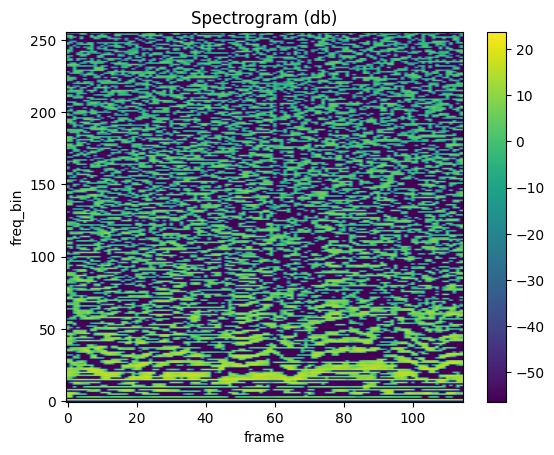

In [38]:
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)


sample_audio_path = df_hesitation[df_hesitation['has_hesitation'] == 1].iloc[40]['file_path']
Audio(sample_audio_path)

waveform, sample_rate = torchaudio.load(sample_audio_path)

n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
      'n_fft': n_fft,
      'n_mels': n_mels,
      'hop_length': hop_length,
      'mel_scale': 'htk',
    }
)

mfcc = mfcc_transform(waveform)

plot_spectrogram(mfcc[0])

In [40]:
mfcc.shape

torch.Size([1, 256, 115])

In [23]:
sample_audio_path = df_hesitation.iloc[0]['file_path']

## setting model

In [42]:
from transformers import AutoFeatureExtractor, ASTForAudioClassification
from transformers import AutoProcessor, AutoModelForAudioClassification
import torch
from torch import nn

In [43]:
from transformers import Wav2Vec2FeatureExtractor

In [44]:
device = torch.device("cuda")

# feature_extractor = AutoFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

feature_extractor = AutoFeatureExtractor.from_pretrained("alefiury/wav2vec2-xls-r-300m-pt-br-spontaneous-speech-emotion-recognition")
# processor = AutoProcessor.from_pretrained("alefiury/wav2vec2-xls-r-300m-pt-br-spontaneous-speech-emotion-recognition")

def get_model(dropout: float):
	# model = ASTForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
	model = AutoModelForAudioClassification.from_pretrained("alefiury/wav2vec2-xls-r-300m-pt-br-spontaneous-speech-emotion-recognition")

	# MIT/ast-finetuned-audioset-10-10-0.4593
	# dense_in_features = model.classifier.dense.in_features
	# n_classes = 2
	# model.classifier.dense = nn.Sequential(
	#     nn.Dropout(dropout, inplace=True),
	#     nn.Linear(in_features=dense_in_features, out_features=n_classes),
	# )


	# alefiury/wav2vec2-xls-r-300m-pt-br-spontaneous-speech-emotion-recognition
	dense_in_features = model.classifier.in_features
	n_classes = 2
	model.classifier = nn.Sequential(
		nn.Dropout(dropout, inplace=True),
		nn.Linear(in_features=dense_in_features, out_features=n_classes),
	)
	model


	for param in model.parameters():
		param.requires_grad = True

	for param in model.classifier.parameters():
		param.requires_grad = True
		
	return model

## setting dataset to torch dataset

In [45]:
import librosa
from torch.nn.functional import cross_entropy

def get_features(file_paths:list) -> torch.Tensor:
	sampling_rate = 16_000
	waveforms = []
	for file_path in file_paths:
		waveform, original_samplerate = librosa.load(file_path)
		waveform = librosa.resample(waveform, orig_sr=original_samplerate, target_sr=sampling_rate)
		waveforms.append(waveform)

	# MIT/ast-finetuned-audioset-10-10-0.4593
	#features = feature_extractor(waveforms, sampling_rate=sampling_rate, return_tensors="pt")

	# alefiury/wav2vec2-xls-r-300m-pt-br-spontaneous-speech-emotion-recognition
	features = feature_extractor(waveforms, sampling_rate=sampling_rate, return_tensors="pt", padding=True) #, truncation=True, max_length=10000)
	
	return features

In [46]:
features = get_features(df_hesitation['file_path'])
features['input_values'].shape

torch.Size([138, 79761])

In [ ]:
features['labels'] = torch.tensor(df_hesitation['has_hesitation'],dtype=torch.int64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features['input_values'], features['labels'], test_size=0.2, random_state=1)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=12, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=12, shuffle=True)

## training model

In [ ]:
def eval_model(model) -> tuple:
	"""
	return:
	loss
	accuracy
	"""
	model.eval()

	running_loss = 0
	running_corrects = 0
	for i, (inputs, labels) in enumerate(test_dataloader):
		inputs, labels = inputs.to(device), labels.to(device)
		with torch.no_grad():
			logits = model(inputs).logits
			loss = cross_entropy(logits, labels)
			predicted_class = torch.argmax(logits, dim=-1)

			running_loss += loss.item()
			running_corrects += sum(labels == predicted_class)
	loss = (running_loss/len(test_dataloader))
	accuracy = running_corrects/(len(test_dataloader) * test_dataloader.batch_size)
	return loss, accuracy

In [ ]:
import ray

put_train = ray.put(train_dataloader)
put_test = ray.put(test_dataloader)

In [ ]:
def train_func(model, dataloader, optimizer, exp_lr_scheduler, clip_value):
	total = 0
	device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
	model.train()
	running_loss = 0
	correct = 0

	pred_np = []
	target_np = []
	for i, (data, target) in enumerate(dataloader):
		data, target = data.to(device), target.to(device)

		optimizer.zero_grad()

		output = model(data).logits
		loss = cross_entropy(output, target)

		total += output.size(0)
		running_loss += loss.item() * output.size(0)

		loss.backward()

		torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
		optimizer.step()
			# accuracy
		_, predicted = torch.max(output.data, 1)
		# _, correct_class = torch.max(target.data, 1)

		correct += (predicted == target).sum().item()

		pred_np.append(predicted.detach().cpu().numpy())
		target_np.append(target.detach().cpu().numpy())

	exp_lr_scheduler.step()


	pred_np = np.concatenate(pred_np)
	target_np = np.concatenate(target_np)

	return {
		"mean_loss": running_loss / total,
		"accuracy": accuracy_score(target_np, pred_np),
		"f1_score": f1_score(target_np, pred_np),
	}

def test_func(model, dataloader):
	device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
	model.eval()
	correct = 0
	total = 0
	running_loss = 0
	
	pred_np = []
	target_np = []
	with torch.no_grad():
		for batch_idx, (data, target) in enumerate(dataloader):

			data, target = data.to(device), target.to(device)
			outputs = model(data).logits

			# accuracy
			_, predicted = torch.max(outputs.data, 1)
			# _, correct_class = torch.max(target.data, 1)
			total += target.size(0)
			correct += (predicted == target).sum().item()

			pred_np.append(predicted.detach().cpu().numpy())
			target_np.append(target.detach().cpu().numpy())

			# loss
			running_loss += cross_entropy(outputs, target).item() * outputs.size(0)

	pred_np = np.concatenate(pred_np)
	target_np = np.concatenate(target_np)

	return {
		"mean_loss": running_loss / total,
		"accuracy": accuracy_score(target_np, pred_np),
		"f1_score": f1_score(target_np, pred_np),
	}

In [ ]:
import os
import tempfile

from torch import optim

from ray import train
from ray.train import Checkpoint

def train_hesitation(config, max_epochs=30, tunning=True):
	train_dataloader = ray.get(put_train)
	test_dataloader = ray.get(put_test)

	# Data Setup
	device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

	model = get_model(config['classifier_dropout'])
	model.to(device)

	optimizer = optim.SGD(
		model.parameters(),
		lr=config["lr"],
		momentum=config["momentum"],
		weight_decay=config['weight_decay'],
		nesterov=config['nesterov']
	)

	exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=config['lr_scheduler_gamma'])
	for i in range(max_epochs):
		train_log = train_func(model, train_dataloader, optimizer, exp_lr_scheduler, config['clip_value'])
		val_log = test_func(model, test_dataloader)

		if tunning:
			with tempfile.TemporaryDirectory() as temp_checkpoint_dir:
				checkpoint = None
				if (i + 1) % max_epochs == 0 and (val_log["mean_loss"] < 0.4):
					# This saves the model to the trial directory
					torch.save(
						model.state_dict(),
						os.path.join(temp_checkpoint_dir, "model.pth")
					)
					checkpoint = Checkpoint.from_directory(temp_checkpoint_dir)

				# Send the current training result back to Tune
				train.report(
					{
						"train_mean_loss": train_log["mean_loss"],
						"train_accuracy": train_log["accuracy"],
						"train_f1_score": train_log["f1_score"],
						"val_mean_loss": val_log["mean_loss"],
						"val_accuracy": val_log["accuracy"],
						"val_f1_score": val_log["f1_score"],
					},
					checkpoint=checkpoint
				)
		else:
			print("-"*10, f"epoch: {i+1}/{max_epochs}","-"*10)
			print(f"train: {train_log}\nval: {val_log}")
	if not tunning:
		return {
			"model": model,
			"log": {
				"train": train_log,
				"val": val_log,
			},
		}

In [ ]:
max_cpus = os.cpu_count()
max_gpus = torch.cuda.device_count()
max_cpus, max_gpus

In [ ]:
from ray import tune

from ray.tune.search.optuna import OptunaSearch

from ray.tune.schedulers import ASHAScheduler


config = {
	"lr": tune.loguniform(1e-5, 1e-0),
	"momentum": tune.uniform(0.1, 0.9),
	"classifier_dropout": tune.uniform(0.3, 0.7),
	"weight_decay": tune.loguniform(1e-6, 1e-2),
	"clip_value": tune.randint(1, 5+1),
	"lr_scheduler_gamma": tune.uniform(0.5, 1.0),
	"nesterov": tune.choice([True, False]),
}

metric = "val_mean_loss"
mode = "min"

optuna_search = OptunaSearch(
	metric=metric,
	mode=mode,
	# points_to_evaluate = curr_best_params,
)

asas_scheduler = ASHAScheduler(
	time_attr='training_iteration',
	metric=metric,
	mode=mode,
	max_t=10,
	grace_period=1,
	reduction_factor=3,
	brackets=2
)

trainable_with_resources = tune.with_resources(train_hesitation, {"cpu": max_cpus, "gpu": max_gpus})

tuner = tune.Tuner(
	trainable_with_resources,
	tune_config=tune.TuneConfig(
		num_samples=20,
		search_alg=optuna_search,
		scheduler=asas_scheduler
	),
	param_space=config,
)
results = tuner.fit()

In [ ]:
results.get_dataframe().to_csv("raytune_results.csv")

In [ ]:
df_results = results.get_dataframe()
df_results.head()

In [ ]:
scores = df_results['val_f1_score'].plot(kind='hist', title='f1_score hist')

In [ ]:
best_result = results.get_best_result("val_accuracy", mode="max")
best_result.metrics

In [ ]:
best_result = results.get_best_result("val_mean_loss", mode="min")
best_result.metrics

In [ ]:
import json

with open("best_result.json", 'w') as f:
	json.dump(best_result.config, f, default=str)

In [ ]:
best_config_train_model = train_hesitation(best_result.config, max_epochs=10, tunning=False)

## evaluating model

In [ ]:
model = best_config_train_model['model']

In [ ]:
model.eval()
all_labels = []
all_preds = []
for i, (inputs, labels) in enumerate(test_dataloader):
	inputs, labels = inputs.to(device), labels.to(device)
	with torch.no_grad():
		logits = model(inputs).logits
		predicted_class_ids = torch.argmax(logits, dim=-1)

	all_labels.append(labels)
	all_preds.append(predicted_class_ids)

all_labels = torch.concat(all_labels).cpu()
all_preds = torch.concat(all_preds).cpu()

all_labels.shape, all_preds.shape

In [ ]:
classes_names = ['ausent', 'hesitation']

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot()
plt.show()
print("\n")
print(classification_report(all_labels, all_preds, target_names=classes_names))
print("\naccuracy:", accuracy_score(all_labels, all_preds))